<a href="https://colab.research.google.com/github/kweenkeen/ProofMode/blob/main/proof_data_output_largeset_MODULAR_OUTLIERS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Installing all dependencies

!pip install PyPDF2
from datetime import date
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
from PyPDF2 import PdfFileMerger
from matplotlib import rcParams
from google.colab import files
import re

# Uploading ProofMode collection file, created by reate_csv_pandas_subdirectories_dictionary.py
proof_mode_file = files.upload()
filename = next(iter(proof_mode_file))
df = pd.read_csv(filename)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Saving ProofMode_Collection_2022-01-27_Fabby2.csv to ProofMode_Collection_2022-01-27_Fabby2 (1).csv


In [159]:
def renaming_function_CSV_file(df):
  new_column_names = []
  for (columnName, columnData) in df.iteritems():
    columnName_split = columnName.replace(".", " ")
    for ind, char in enumerate(columnName[:-1]):
      if columnName[ind].islower() and columnName[ind+1].isupper():
        columnName_split = columnName[:ind+1] + ' ' + columnName[ind+1:]
    new_column_names.append(columnName_split)

  df.columns=new_column_names


In [160]:
renaming_function_CSV_file(df)

In [161]:
df.head()

,File Hash SHA256,Locale,Safety Check Cts Match,Location Provider,IPv6,IPv4,Location Accuracy,Location Latitude,Language,Network Type,...,Safety Check Basic Integrity,Location Time,File Modified,Cell Info,Safety Check,Location Altitude,Safety Check Timestamp,Proof Generated,File Path,Location Speed
0,447fbebbfd71e71b3440dca3fac1dadb78aa573aaf7438...,USA,NaN,NaN,FE80::6609:ACFF:FE37:7CE9 2600:8803:B806:9600:...,192.168.0.15,NaN,NaN,English,Wifi,...,NaN,NaN,Monday January 24 2022 10:37:05 PM Central S...,[],NaN,NaN,NaN,Wednesday January 26 2022 1:28:38 AM Central...,/storage/emulated/0/DCIM/Camera/IMG_20220124_2...,NaN
1,796bf6fe5e16ccabb404994799758ea268272405d6563a...,USA,NaN,NaN,FE80::6609:ACFF:FE37:7CE9 2600:8803:B806:9600:...,192.168.0.15,NaN,NaN,English,Wifi,...,NaN,NaN,Monday January 24 2022 10:37:07 PM Central S...,[],NaN,NaN,NaN,Wednesday January 26 2022 1:30:36 AM Central...,/storage/emulated/0/DCIM/Camera/IMG_20220124_2...,NaN
2,9f38ed71e5520746024f69c79572428be07a66d8f72b1b...,USA,NaN,NaN,FE80::6609:ACFF:FE37:7CE9 2600:8803:B806:9600:...,192.168.0.15,NaN,NaN,English,Wifi,...,NaN,NaN,Monday January 24 2022 10:37:11 PM Central S...,[],NaN,NaN,NaN,Wednesday January 26 2022 1:32:25 AM Central...,/storage/emulated/0/DCIM/Camera/IMG_20220124_2...,NaN
3,b7eedca7abc17965b9302cddc2e1e1771c3d975d976985...,USA,NaN,NaN,FE80::6609:ACFF:FE37:7CE9 2600:8803:B806:9600:...,192.168.0.15,NaN,NaN,English,Wifi,...,NaN,NaN,Monday January 24 2022 10:37:14 PM Central S...,[],NaN,NaN,NaN,Wednesday January 26 2022 1:33:47 AM Central...,/storage/emulated/0/DCIM/Camera/IMG_20220124_2...,NaN
4,1160deb07325ac0745eed79cc6fdfd639360ba8940951b...,USA,NaN,gps,FE80::E0A5:8CFF:FE2D:4596 2600:8803:B806:9600:...,192.168.0.155,10.7,35.599512,English,Wifi,...,NaN,1.643160e+12,Monday January 24 2022 10:38:59 PM Central S...,[],NaN,371.0,NaN,Wednesday January 26 2022 1:54:28 AM Central...,/storage/emulated/0/DCIM/Camera/20220124_22385...,0.0


In [17]:
def binning_function(df):

  # Rename columns to be more reader-friendly
  # Define global variables

  global header_list
  global hardware_list
  global software_list
  
  # Create list of titles
  hardware_software_metdata_list = ['Locale', 'Location Provider', 'IPv6', 'IPv4','Language', 'Network Type', 'Network', 'Manufacturer', 'Data Type', 'Hardware', 'Screen Size', 'Cell Info']
    
  # Create lists for subtype attributes
  # software_list = ["Locale", "Location Provider", "Language", "Network Type", "Network", "Cell Info"]
  # hardware_list = ["IPv6", "IPv4", "Manufacturer", "Hardware", "Screen Size"]

  #Initiate device ID dataframe
  DeviceID_List = []

  # Create new dataframe for pivot table, with Unique Device IDs as the column headers, and hardware/software features as the row index
  for i in list(df['Device ID']):
    if i not in DeviceID_List:
      DeviceID_List.append(i)

  device_df = pd.DataFrame(columns=DeviceID_List, index=hardware_software_metdata_list)

  # Group number of each unique feature by device ID.
  # (For example, if there are two language per device ID, count "2")
  # For most features, there will be 1 feature per device ID.

  for i, row in device_df.iterrows():
    aggregate_df = df.groupby("Device ID")[i].nunique()
    device_df = device_df.append(aggregate_df)

  #This is a REALLY SLOPPY way of doing this, but it's what worked quickest so I'm leaving it for now.
  # If you're translating this into JavaScript, a better option would be to replace each line based on the index
  device_df = device_df.dropna()

  # In a future version of the code, I'm going to change the initiation of the DeviceID Dataframe to avoid having to transpose it later on.
  # Trial and error process of working with the histogram and the pivot table, sorry about that!
  transpose_df = device_df.T

  return transpose_df

In [18]:
df.head()

,File Hash SHA256,Locale,SafetyCheck Cts Match,Location Provider,IPv6,IPv4,Location Accuracy,Location Latitude,Language,Network Type,...,SafetyCheck Basic Integrity,Location Time,File Modified,Cell Info,Safety Check,Location Altitude,Safety Check Timestamp,Proof Generated,File Path,Location Speed
0,447fbebbfd71e71b3440dca3fac1dadb78aa573aaf7438...,USA,NaN,NaN,FE80::6609:ACFF:FE37:7CE9 2600:8803:B806:9600:...,192.168.0.15,NaN,NaN,English,Wifi,...,NaN,NaN,Monday January 24 2022 10:37:05 PM Central S...,[],NaN,NaN,NaN,Wednesday January 26 2022 1:28:38 AM Central...,/storage/emulated/0/DCIM/Camera/IMG_20220124_2...,NaN
1,796bf6fe5e16ccabb404994799758ea268272405d6563a...,USA,NaN,NaN,FE80::6609:ACFF:FE37:7CE9 2600:8803:B806:9600:...,192.168.0.15,NaN,NaN,English,Wifi,...,NaN,NaN,Monday January 24 2022 10:37:07 PM Central S...,[],NaN,NaN,NaN,Wednesday January 26 2022 1:30:36 AM Central...,/storage/emulated/0/DCIM/Camera/IMG_20220124_2...,NaN
2,9f38ed71e5520746024f69c79572428be07a66d8f72b1b...,USA,NaN,NaN,FE80::6609:ACFF:FE37:7CE9 2600:8803:B806:9600:...,192.168.0.15,NaN,NaN,English,Wifi,...,NaN,NaN,Monday January 24 2022 10:37:11 PM Central S...,[],NaN,NaN,NaN,Wednesday January 26 2022 1:32:25 AM Central...,/storage/emulated/0/DCIM/Camera/IMG_20220124_2...,NaN
3,b7eedca7abc17965b9302cddc2e1e1771c3d975d976985...,USA,NaN,NaN,FE80::6609:ACFF:FE37:7CE9 2600:8803:B806:9600:...,192.168.0.15,NaN,NaN,English,Wifi,...,NaN,NaN,Monday January 24 2022 10:37:14 PM Central S...,[],NaN,NaN,NaN,Wednesday January 26 2022 1:33:47 AM Central...,/storage/emulated/0/DCIM/Camera/IMG_20220124_2...,NaN
4,1160deb07325ac0745eed79cc6fdfd639360ba8940951b...,USA,NaN,gps,FE80::E0A5:8CFF:FE2D:4596 2600:8803:B806:9600:...,192.168.0.155,10.7,35.599512,English,Wifi,...,NaN,1.643160e+12,Monday January 24 2022 10:38:59 PM Central S...,[],NaN,371.0,NaN,Wednesday January 26 2022 1:54:28 AM Central...,/storage/emulated/0/DCIM/Camera/20220124_22385...,0.0


In [19]:
transpose_df = binning_function(df)

In [20]:
transpose_df.head()

,Locale,Location Provider,IPv6,IPv4,Language,Network Type,Network,Manufacturer,Data Type,Hardware,Screen Size,Cell Info
35ow5ifrnuvmzguko87wvkeg8,1,0,1,1,1,1,1,1,1,1,1,1
4r83r0sk1f1x8akc1mrszso0n,1,1,1,1,1,1,1,1,1,1,1,1
3hsk2wook5uvehesdc1xo85j0,1,1,1,1,1,1,1,1,1,1,1,2
4dq4eszdb98ukzd78rlx2rr7,1,1,1,1,1,1,1,1,1,1,1,1
4gf222mtlsf8d0xjxf26hh5sz,1,0,1,1,1,1,1,1,1,1,1,1


In [140]:
def small_plots(transpose_df):

  # CREATING SUBPLOTS
  
  fig = plt.figure()
  fig.tight_layout()
  plt.style.use('seaborn')


  for label, content in transpose_df.iteritems():
    i = 0
    for number_attributes in content.values:
      if number_attributes != 1:
        print("Hello", label)
        fig.tight_layout()
        # axs = fig.add_subplot(2, 3, i+1)
        plt.hist(transpose_df[label], align='mid')
        plt.xlabel("Outliers")
        plt.ylabel("Number of Unique Devices")
        i += 1
        
    plt.savefig('foo.png', bbox_inches='tight')

  # files.download('foo.png')

Hello Location Provider
Hello Location Provider
Hello Location Provider
Hello Cell Info


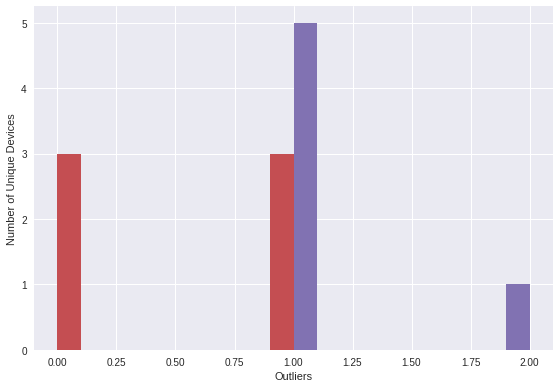

In [141]:
small_plots(transpose_df)

In [167]:
def outliers_histogram(transpose_df):
    outliers_df = pd.DataFrame()
    for label, content in transpose_df.iteritems():
      i = 0
      for number_attributes in content.values:
        if number_attributes != 1:
          outliers_df[label] = content
    outliers_list = list(outliers_df.columns.values)

    return outliers_df, outliers_list


In [151]:
outliers_df = outliers_histogram(df)

In [168]:
def layered_histogram(transpose_df):
  # Import altair
  outliers_df, outliers_list = outliers_histogram(transpose_df)

  import altair as alt

  # Extract headers from column names
  source = transpose_df
  header_list = list(source.columns)

  chart = alt.Chart(source).transform_fold(
      outliers_list,
      as_=['Device Attribute', 'Unique Devices']
  ).mark_bar(
      opacity=1,
      binSpacing=1,
      clip=True
  ).encode(
      x = alt.X('Unique Devices:Q', axis=alt.Axis(title='Number of Attributes per Device', tickMinStep=1)),
      y = alt.Y('count()', stack=None, axis=alt.Axis(title='Number of Unique Devices', tickMinStep=1)),
      color = alt.Color('Device Attribute:N', scale=alt.Scale(scheme='paired'))

  ).properties(
      title='Histogram of Attributes Across Devices'
  )


  chart.configure_title(
      fontSize=20,
      font='Tahoma',
      anchor='start',
      color='grey')
  
  return(chart)

In [169]:
layered_histogram(transpose_df)

alt.Chart(...)